#### Setup

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width",200)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Content Management 

![Automation!](./img/automation.jpg)

- Users can host a wide variety of content
- Managing content is essential to a well run system
- There are multiple [item type](https://developers.arcgis.com/rest/users-groups-and-items/items-and-item-types.htm) that Enterprise/ArcGIS Online can host
- Items have a complex [relationship](https://developers.arcgis.com/rest/users-groups-and-items/relationship-types.htm) that is often not visible to the regular user

## Why Automate Content Management?

- time saving
- increated productivity
- consistency and accuracy
- version control and tracking
- scalability


## Understanding your Site

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from arcgis.gis import GIS
from arcgis.gis import ItemTypeEnum, ItemProperties
from arcgis.gis import Item

In [4]:
gis = GIS(profile='your_online_admin_profile')
content_manager = gis.content

### Searching and Exploring
![Exploring!](./img/exploring.jpg)

- If you don't know what you have, how can you move forward?
- The `search` and `advanced_search` methods allow you to explore, understand and find content
- Built-in reports provide insights

#### Basic Search

- Gives a general insight into Items located on your site
- Need to specify the number of items returned
- Always searches within your organization first

In [5]:
items = content_manager.search("Roads")
items

[<Item title:"Automate Road Surface Investigation Using Deep Learning" type:Notebook owner:api_data_owner>,
 <Item title:"Ug_Highways_Clipped" type:Service Definition owner:maggarwal_geosaurus>,
 <Item title:"Theodore Roosevelt National Park" type:StoryMap owner:jyaist_geosaurus>,
 <Item title:"511 Traveler Information Events - Iowa" type:Feature Layer Collection owner:jyaist_geosaurus>,
 <Item title:"Automatic road extraction using deep learning" type:Notebook owner:api_data_owner>,
 <Item title:"GTM_Inf_from_replica" type:Feature Layer Collection owner:jyaist_geosaurus>,
 <Item title:"automate_road_surface_investigation_using_deep_learning" type:Notebook owner:api_data_owner>,
 <Item title:"South Pleasant Valley Road" type:StoryMap owner:api_data_owner>,
 <Item title:"South Pleasant Valley Road" type:StoryMap owner:arcgis_python>,
 <Item title:"Automate Road Surface Investigation Using Deep Learning - Copy cb6220" type:Notebook owner:api_data_owner>]

##### Filtering by Type

- When you want a specific type of data, use `item_type`

In [6]:
#Getting Help in Jupyter Notebooks:
content_manager.search?

Signature:
content_manager.search(
    query: 'str',
    item_type: 'Optional[str]' = None,
    sort_field: 'str' = 'avgRating',
    sort_order: 'str' = 'desc',
    max_items: 'int' = 10,
    outside_org: 'bool' = False,
    categories: 'Optional[Union[list[str], str]]' = None,
    category_filters: 'Optional[Union[list[str], str]]' = None,
    enrich: 'Optional[bool]' = None,
    filter: 'Optional[str]' = None,
)
Docstring:
The ``search`` method searches for portal items.


.. note::
    A few things that will be helpful to know...

    1. The query syntax has many features that can't be adequately
       described here.  Please see the ArcGIS REST API `Search
       Reference <https://developers.arcgis.com/rest/users-groups-and-items/search-reference.htm>`_
       for full details on search engine used with this method.

    2. Most of the time when searching for items, you'll want to
       search within your organization in ArcGIS Online
       or within your Portal.  As a convenie

In [7]:
rd_items = content_manager.search(
    query="Roads",
    item_type="Web Map",
    outside_org=True,
    max_items=100
)

rd_items

[<Item title:"Dutch Topographic Basemap" type:Web Map owner:jeroenvanwinden>,
 <Item title:"Streets (Night)" type:Web Map owner:esri>,
 <Item title:"Navigation" type:Web Map owner:esri>,
 <Item title:"Topographic" type:Web Map owner:esri>,
 <Item title:"Modern Antique Map" type:Web Map owner:esri>,
 <Item title:"Colored Pencil Map" type:Web Map owner:esri>,
 <Item title:"Human Geography Map" type:Web Map owner:esri>,
 <Item title:"Housing with Mortgages" type:Web Map owner:AtlasPublisher>,
 <Item title:"Montana Rest Areas" type:Web Map owner:MDT_Admin>,
 <Item title:"Ocean Basemap" type:Web Map owner:esri>,
 <Item title:"Streets (with Relief)" type:Web Map owner:esri>,
 <Item title:"ArcGIS Online Directions and Routing Services Coverage" type:Web Map owner:esri>,
 <Item title:"Streets" type:Web Map owner:esri>,
 <Item title:"Dark Gray Canvas" type:Web Map owner:esri>,
 <Item title:"OpenStreetMap" type:Web Map owner:esri>,
 <Item title:"Merry Christmas Map (v2)" type:Web Map owner:esri_

##### Filtering by a User

In [8]:
items = content_manager.search(
    query=f"Hurricanes owner:api_data_owner",
    item_type="Web Map", 
    enrich=True
)

items

[<Item title:"Building_damage_hurricanes_2" type:Web Map owner:api_data_owner>,
 <Item title:"WebMap for Landfall Spotlight Article" type:Web Map owner:api_data_owner>,
 <Item title:"WebMap for Landfall track density" type:Web Map owner:api_data_owner>,
 <Item title:"Building_damage_Hurricanes_1" type:Web Map owner:api_data_owner>]

#### Advanced Search

- fully customize the search experience

In [9]:
items = content_manager.advanced_search(
    query="Roads type:'Web Map'", 
    as_dict=True)

items['results'][0]

{'id': '0d973facf0bb4513b405841fa4ddd010',
 'owner': 'sup946_PennStateGIS',
 'created': 1532038856000,
 'modified': 1532402120000,
 'guid': None,
 'name': None,
 'title': '\nVisualizing the\nNew Silk Road\n',
 'type': 'Web Mapping Application',
 'typeKeywords': ['Cascade',
  'JavaScript',
  'layout-cascade-1',
  'Map',
  'Mapping Site',
  'Online Map',
  'Ready To Use',
  'selfConfigured',
  'Story Map',
  'Story Maps',
  'Web Map'],
 'description': None,
 'tags': ['Story Map', 'Cascade'],
 'snippet': None,
 'thumbnail': 'thumbnail/thumbnail.png',
 'documentation': None,
 'extent': [],
 'categories': [],
 'spatialReference': None,
 'accessInformation': None,
 'classification': None,
 'licenseInfo': None,
 'culture': 'en-us',
 'properties': None,
 'advancedSettings': None,
 'url': 'https://pennstategis.maps.arcgis.com/apps/Cascade/index.html?appid=0d973facf0bb4513b405841fa4ddd010',
 'proxyFilter': None,
 'access': 'public',
 'size': -1,
 'subInfo': 0,
 'appCategories': [],
 'industries'

##### Gathering Statistics

- How do we know what is on our organization as a glance?
- Advanced statistics gives insight into what is on our site

In [10]:
counts = content_manager.advanced_search(
    query=f"accountid:{gis.properties.id}", 
    count_fields="type, access", 
    count_size=200
)

In [11]:
counts

{'counts': [{'fieldName': 'access',
   'fieldValues': [{'value': 'private', 'count': 12009},
    {'value': 'org', 'count': 3188},
    {'value': 'public', 'count': 884},
    {'value': 'shared', 'count': 324}]},
  {'fieldName': 'type',
   'fieldValues': [{'value': 'feature service', 'count': 3338},
    {'value': 'feature collection', 'count': 3106},
    {'value': 'shapefile', 'count': 2891},
    {'value': 'csv', 'count': 1482},
    {'value': 'web map', 'count': 1318},
    {'value': 'file geodatabase', 'count': 981},
    {'value': 'storymap', 'count': 777},
    {'value': 'notebook', 'count': 722},
    {'value': 'service definition', 'count': 217},
    {'value': 'deep learning package', 'count': 200},
    {'value': 'web experience', 'count': 143},
    {'value': 'dashboard', 'count': 105},
    {'value': 'image collection', 'count': 99},
    {'value': 'api key', 'count': 93},
    {'value': 'hub site application', 'count': 79},
    {'value': 'vector tile service', 'count': 78},
    {'value': 

##### Exploring the Access Types of Items

In [12]:
for fv in counts['counts'][1]['fieldValues']:
    print(f"{fv['value']:30}{fv['count']}")

feature service               3338
feature collection            3106
shapefile                     2891
csv                           1482
web map                       1318
file geodatabase              981
storymap                      777
notebook                      722
service definition            217
deep learning package         200
web experience                143
dashboard                     105
image collection              99
api key                       93
hub site application          79
vector tile service           78
web mapping application       76
web scene                     75
microsoft excel               68
image                         63
map service                   53
image service                 44
code sample                   35
hub page                      33
scene service                 24
application                   22
form                          22
scene package                 21
csv collection                19
vector tile package       

<Axes: xlabel='access'>

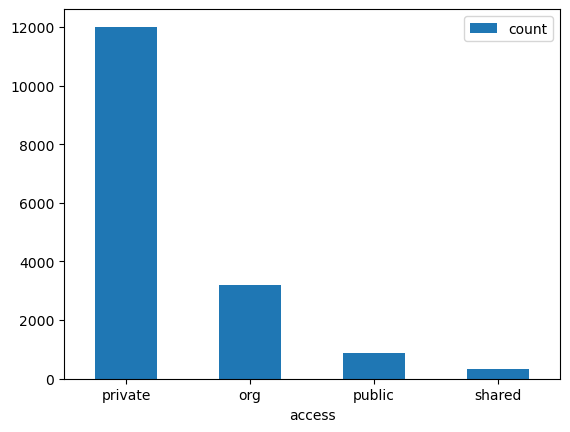

In [13]:
data = counts['counts'][0]['fieldValues']
df = pd.DataFrame(data, )
df.columns=['access', 'count']
df.plot.bar(x='access', y='count', rot=0)

##### Exploring the Top 5 Content Types

<Axes: xlabel='type'>

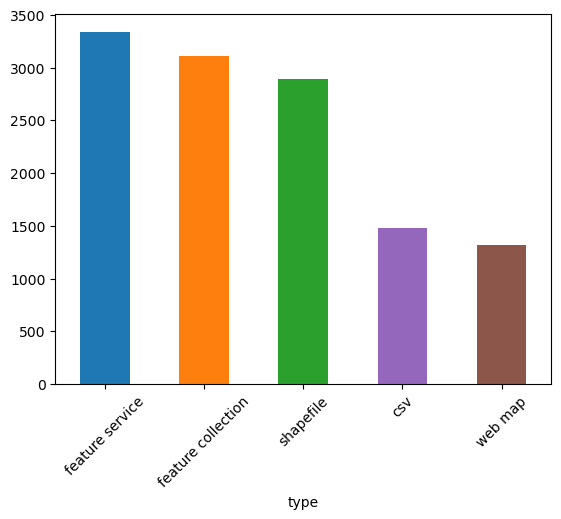

In [14]:
df = pd.DataFrame(counts['counts'][1]['fieldValues']).head()
df.columns=['type', 'count']
df.plot.bar(
    x='type', 
    y='count', 
    rot=45, 
    color=['C0', 'C1', 'C2', 'C4', 'C5'], 
    legend=False
)

### Looking at a Specific User's Content

![User Exploration!](./img/magnifying_glass.jpg)

- Users hold content, that means examining user content is very important
- As an administrator, you can stage, modify and delete user content

#### Get a list of user items

In [15]:
user = gis.users.get("arcgis_python")

In [16]:
items = user.items(max_items=10000)
print(f"This user: {user.username} has {len(items)} items!")

This user: arcgis_python has 8770 items!


##### **Find Private Items with Relationships**

In [17]:
%%capture --no-stdout --no-display

query=f'owner:{user.username}  access:private accountid:{gis.properties.id}  type:("Feature Collection" OR "Feature Service")'
target_items = content_manager.advanced_search(
    query=query, 
    max_items=-1,
)['results']

In [18]:
directions = ['forward', 'reverse']
relationships = ['Service2Data', 'Solution2Item']

In [19]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

removable_items = []
dependent_items = {}
for item in target_items[21:40]:
    related_items = []
    for direction in directions:
        for rel in relationships:
            try:
                related_items.extend(
                    item.related_items(
                        rel_type=rel, 
                        direction=direction
                    )
                )
            except:
                ...   
    if len(related_items) == 0:
        removable_items.append(item) 
    else:
        if item.id in dependent_items:
            dependent_items[item.id]['rels'].extend(related_items)
        else:
            dependent_items[item.id] = {}
            dependent_items[item.id] = {'source' : item}
            dependent_items[item.id]['rels'] = related_items

In [20]:
dependent_items[list(dependent_items.keys())[0]]

{'source': <Item title:"72517d383fb44d7ab0d58a96a199e538" type:Feature Layer Collection owner:arcgis_python>,
 'rels': [<Item title:"72517d383fb44d7ab0d58a96a199e538" type:File Geodatabase owner:arcgis_python>]}

In [21]:
key_list = list(dependent_items.keys())
key_list

['181f4336a2564c56aa95a3d10f859a03',
 '59d2a33715774f298b4c3f71d8de3a94',
 '7017dbd4050c471da7af1c3795ba2c76',
 'ea84fd8a4b5344e0a8156132e97008a5',
 'ea3c9785163043ca9122936bc9138439',
 '93851bfd4b604eff85f0045aa4e4fa06',
 '11be64638ab642df8aa5cdb95c6ee455']

In [22]:
gis.content.get(key_list[3])

<Item title:"76825128fee6465c998d988f8508fb01" type:Feature Layer Collection owner:arcgis_python>

In [23]:
print(f"item: {key_list[3]}\n{'-' * 15}")
dependent_items[key_list[3]]

item: ea84fd8a4b5344e0a8156132e97008a5
---------------


{'source': <Item title:"76825128fee6465c998d988f8508fb01" type:Feature Layer Collection owner:arcgis_python>,
 'rels': [<Item title:"76825128fee6465c998d988f8508fb01" type:File Geodatabase owner:arcgis_python>]}

- when deleting items, you must clean up the children!

In [ ]:
items_to_delete = []

for i in items_to_delete:
    ritems = i.related_items("Service2Data","forward")
    if ri_items:
        for rit in ri_items:
            rit.delete()
    i.delete()

### Adding and Publishing Content

![Add and Publish Content!](./img/publish_stuff.jpg)

- So far, we have looked at other people's content 
- Users with creator+ permissions can add and publish new content
- The Python API removes those clicks, and no one likes clicks

#### Create a new user

In [24]:
import uuid
username = "a" + uuid.uuid4().hex[:5] + "z"
old_pw = "m3g4S3CUR3!2"
um = gis.users
user = um.create(username=username,
                 password=old_pw,
                 firstname="Rando",
                 lastname="Account",
                 email="python@esri.com")
user

<User username:af4788z>

##### Setting a User's Security Question

In [25]:
user.update(security_question=1,
            security_answer=uuid.uuid4().hex)

True

##### Reset a User's Password

In [26]:
pw = uuid.uuid4().hex[:5]+ "!aA"

user.reset(password=old_pw,
           new_password=pw)

True

In [27]:
pw

'8c941!aA'

In [28]:
GIS(username=user.username, password=pw, set_active=False).users.me

<User username:af4788z>

#### Add Content to New User

- `ItemProperties` is a defined data class to assist you with adding new content
- `ItemTypeEnum` is an enumeration with common item types

##### Add data item to a Folder

In [29]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [31]:
print(user)
print(pw)

<User username:af4788z>
8c941!aA


In [34]:
import warnings
warnings.filterwarnings("ignore", category=ResourceWarning)

user_folder = gis.content.folders.create(
    folder="Kish_data",
    owner=user
)

In [35]:
add_job = user_folder.add(
    item_properties= ItemProperties(
        title="Ancient Kish Buildings", 
        item_type=ItemTypeEnum.SHAPEFILE,
        snippet="Settlements from the ancient Kish civilization.",
        tags=["archaeology","ancient history", "demo_purposes"]
    ),
    file=r"./data/Kish_spatial.zip",
)


In [37]:
item = add_job.result()

In [38]:
item

<Item title:"Ancient Kish Buildings" type:Shapefile owner:af4788z>

##### Publish item

In [ ]:
pitem = item.publish(
    publish_parameters = {
        "name": "ancient_kish_bldgs",
        "target": {"wkid": 27703}
        }
)

#### Update Item Properties

- Items once published can be modified


In [40]:
pitem = gis.content.get("7e75f916e89b4aafadde60713383d4a7")

<Item title:"Ancient Kish Buildings" type:Feature Layer Collection owner:af4788z>
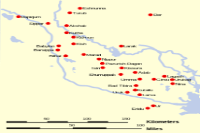

In [41]:
pitem.update(thumbnail=r"./img/kish_inset.png")
pitem

In [42]:
pitem.tags

['archaeology', 'ancient history', 'demo_purposes']

In [65]:
pitem.update(
    item_properties={
        "title":"Ancient Dwellings in Kish area.",
        "tags": pitem.tags + ["ancient dwellings","modern Iraq"]
    }
)


True

In [44]:
pitem.tags

['archaeology',
 'ancient history',
 'demo_purposes',
 'ancient dwellings',
 'modern Iraq']

### Sharing is Caring - Share items

- items can be shared out to the public, within the organization, or to groups
- use the _sharing_ property to access an Item's _SharingManager_

In [66]:
sharing_mgr = pitem.sharing
sharing_mgr

< 7e75f916e89b4aafadde60713383d4a7 SharingManager >

In [46]:
sharing_mgr.shared_with

{'groups': [], 'level': <SharingLevel.PRIVATE: 'PRIVATE'>}

##### Access the SharingLevel Dataclass
Ensures correct values for sharing properties

In [67]:
from arcgis.gis import SharingLevel

sharing_mgr.sharing_level = SharingLevel.ORG

In [68]:
sharing_mgr.shared_with

{'groups': [], 'level': <SharingLevel.ORG: 'ORGANIZATION'>}

### Create a Group

In [57]:
hist_grp = gis.groups.create(
    title="Historical Data Demo Group",
    thumbnail=r"/Users/john3092/Job/imgs/kish_civn.jpeg",
    description="Group with data for ancient historical ititiatives.",
    snippet="Historical data group for demo.",
    tags=["demonstration_purposes","archaeology","ancient dwellings"],
    is_invitation_only=False,
    membership_access="org"
)

In [69]:
hist_grp

<Group title:"Historical Data Demo Group" owner:ArcGISPyAPIBot>

In [70]:
hist_grp.get_members()

{'owner': 'ArcGISPyAPIBot', 'admins': ['ArcGISPyAPIBot'], 'users': []}

In [71]:
hist_grp.content()

[]

### Use SharingGroupManager to share with groups

* the _groups_ property on the _SharingManager_ returns a _SharingGroupManager_ object

In [72]:
sharing_grp = sharing_mgr.groups
sharing_grp

< 7e75f916e89b4aafadde60713383d4a7 SharingGroupManager >

In [73]:
sharing_mgr.groups.add(hist_grp)

True

In [74]:
hist_grp.content()

[<Item title:"Ancient Dwellings in Kish area." type:Feature Layer Collection owner:af4788z>]

#### Deleting Content

In [75]:
%%capture --no-stdout --no-display
pitem.delete()
item.delete()

True

In [76]:
gis.content.folders.get(
    folder=user_folder.properties['title'],
    owner=user
).delete()

True

In [77]:
hist_grp.delete()

True

### Reporting on Content

- as administrators, you have the ability to report on user's information

#### Create a datetime object

In [78]:
import datetime as dt
import pytz

In [79]:
report_type_options = ["content", "activity", "credits", "users", "serviceUsages", "itemUsages"]

In [80]:
jul2 = dt.datetime(2024, 7, 4, tzinfo=pytz.timezone("UTC"))
jul2

datetime.datetime(2024, 7, 4, 0, 0, tzinfo=<UTC>)

In [81]:
jul2ts = int(jul2.timestamp() * 1000)
jul2ts

1720051200000

#### Activity Report

##### Daily

In [82]:
report_item = gis.users.me.report(
    report_type="activity", 
    start_time=jul2,
    duration="daily",
)
report_item

<Item title:"OrganizationActivityDaily_2024-07-04" type:Administrative Report owner:ArcGISPyAPIBot>

In [83]:
fp = report_item.get_data()
adf = pd.read_csv(fp)

In [84]:
for a,b in zip(list(adf.columns[::2]), list(adf.columns)[1::2]):
    print(f"{a:25}{b:25}")

id                       itemTitle                
idType                   orgId                    
orgName                  owner                    
ownerFullName            actor                    
actorFullName            ip                       
action                   created_utc              
request                  reqId                    
clientId                 data                     


In [85]:
adf.action.unique()

array(['login', 'update', 'succeeded', 'add', 'delete', 'share',
       'failedlogin'], dtype=object)

In [86]:
adf[adf.action == "add"][["actorFullName","ip","created_utc","request", "clientId", "id"]]

,actorFullName,ip,created_utc,request,clientId,id
307,Shuang Song,52.171.195.18,2024-07-04 02:28:00,/sharing/rest/content/users/ssong_geosaurus/addItem,arcgisnotebooks,7883b8ee74304e7fa384493407823834
359,ArcGIS Python,198.102.58.250,2024-07-04 05:06:49,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,d1d5d3461ff14b778b5fc1972a51c063
360,ArcGIS Python,20.45.6.124,2024-07-04 05:06:59,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,84432465cf2042f8b98d40db95c7a23a
362,ArcGIS Python,20.45.6.124,2024-07-04 05:07:01,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,715ab092b4444697bd8c15c8755976a9
416,ArcGIS Python,198.102.62.250,2024-07-04 05:49:55,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,d58741ee3e674e3fad4425e7c461308b
424,ArcGIS Python,198.102.62.250,2024-07-04 05:50:10,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,766de27a03eb4ba6821b706380fd8b81
429,ArcGIS Python,198.102.62.250,2024-07-04 05:50:14,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,4f80cc79a0214c47a8c5410c32e249fd
432,ArcGIS Python,198.102.62.250,2024-07-04 05:50:26,/sharing/rest/content/users/arcgis_python/addItem,pythonapi,b66f428401a3462192162cc72e07b087
553,ArcGIS PyAPIBot,198.102.62.250,2024-07-04 07:16:12,/sharing/rest/community/users/ArcGISPyAPIBot/report,pythonapi,bd8bad1fd80949b7ba304bd1727aa325
556,ArcGIS PyAPIBot,198.102.62.250,2024-07-04 07:16:15,/sharing/rest/community/users/ArcGISPyAPIBot/report,pythonapi,c6a8d74ae34743ed81d539e4233a6a29


In [87]:
adf[adf.action == 'delete'][['id', 'idType','actor','actorFullName','ip','created_utc','clientId', 'request']]

,id,idType,actor,actorFullName,ip,created_utc,clientId,request
310,7cd01f24fcee4e3d9cb0b9df20240eda,item,ssong_geosaurus,Shuang Song,71.112.214.29,2024-07-04 02:28:50,arcgisonline,/sharing/rest/content/users/ssong_geosaurus/items/7cd01f24fcee4e3d9cb0b9df20240eda/delete
365,d1d5d3461ff14b778b5fc1972a51c063,item,arcgis_python,ArcGIS Python,20.45.6.124,2024-07-04 05:07:03,pythonapi,/sharing/rest/content/users/arcgis_python/items/d1d5d3461ff14b778b5fc1972a51c063/delete
419,d58741ee3e674e3fad4425e7c461308b,item,arcgis_python,ArcGIS Python,198.102.62.250,2024-07-04 05:49:57,pythonapi,/sharing/rest/content/users/arcgis_python/items/d58741ee3e674e3fad4425e7c461308b/delete
427,766de27a03eb4ba6821b706380fd8b81,item,arcgis_python,ArcGIS Python,198.102.62.250,2024-07-04 05:50:12,pythonapi,/sharing/rest/content/users/arcgis_python/items/766de27a03eb4ba6821b706380fd8b81/delete
555,bd8bad1fd80949b7ba304bd1727aa325,item,ArcGISPyAPIBot,ArcGIS PyAPIBot,198.102.62.250,2024-07-04 07:16:13,pythonapi,/sharing/rest/content/users/ArcGISPyAPIBot/items/bd8bad1fd80949b7ba304bd1727aa325/delete
559,8a353ad2eaf548ff992275dc6e8372fd,item,ArcGISPyAPIBot,ArcGIS PyAPIBot,198.102.62.250,2024-07-04 07:16:19,pythonapi,/sharing/rest/content/users/ArcGISPyAPIBot/items/8a353ad2eaf548ff992275dc6e8372fd/delete
572,f1a71547e6434146b0515f6e8ab0d05e,item,api_data_owner,api_data owner,198.102.62.250,2024-07-04 07:18:27,pythonapi,/sharing/rest/content/users/api_data_owner/items/f1a71547e6434146b0515f6e8ab0d05e/delete
576,42a8fffb14b44ec0949269e6c72df72f,item,api_data_owner,api_data owner,198.102.62.250,2024-07-04 07:18:28,pythonapi,/sharing/rest/content/users/api_data_owner/items/42a8fffb14b44ec0949269e6c72df72f/delete
584,c4ce64b5b0c64e9ab3526fd915ad3d95,item,arcgis_python,ArcGIS Python,198.102.62.250,2024-07-04 07:19:23,pythonapi,/sharing/rest/content/users/arcgis_python/items/c4ce64b5b0c64e9ab3526fd915ad3d95/delete
589,5fbb1ef852d944a083fe7c640179253e,item,arcgis_python,ArcGIS Python,198.102.62.250,2024-07-04 07:19:31,pythonapi,/sharing/rest/content/users/arcgis_python/items/5fbb1ef852d944a083fe7c640179253e/delete


**Find Failed Logins**

In [88]:
q = adf.action == "failedlogin"

In [89]:
adf[q].id.value_counts()

id
HIDDEN_DUE_TO_SECURITY_REASONS    2
Name: count, dtype: int64

In [90]:
adf[q].clientId.value_counts()

clientId
arcgisonline    2
Name: count, dtype: int64

In [91]:
report_item.delete()

True

##### Monthly

In [92]:
date_time_str = "01/06/24"

In [93]:
then = dt.datetime.strptime(date_time_str, "%d/%m/%y")
then = pytz.timezone("US/Pacific").localize(then)

In [94]:
monthly_item = gis.users.me.report(
    report_type="credits", 
    duration="monthly", 
    start_time=then
)

In [95]:
monthly_item

<Item title:"OrganizationCreditsMonthly_2024-06" type:Administrative Report owner:ArcGISPyAPIBot>

Read the input locally

In [96]:
# Read the item data into a temporary CSV file
csv_credits_file = monthly_item.get_data()

# Read the CSV as a DataFrame
modf = pd.read_csv(csv_credits_file, skiprows=3)
modf

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
0,ArcGISPyAPIBot,NaN,53.70,4.88,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,ArcGISPyAPIBot,python api,0.00,0.00,0.0,0.00,0.0,195.52,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,MMajumdar_geosaurus,NaN,23.35,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,MMajumdar_geosaurus,ArcGIS Notebooks,0.00,0.00,0.0,0.00,0.0,0.00,92.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,NGiner_geosaurus,NaN,8.65,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,NGiner_geosaurus,ArcGIS Pro,0.00,0.00,0.0,0.00,0.0,237.40,973.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Python API Test,NaN,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,7987.52,238.04,0.29,0.32,10.83,2.33,0.19
7,andrew57,NaN,12.50,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,api_data_owner,python api,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.58,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,arcgis_python,NaN,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,765.5,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [97]:
q = modf["Spatial Analysis"] > 0
modf[q]

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
8,api_data_owner,python api,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,arcgis_python,python api,0.0,0.0,0.0,0.0,0.0,95.24,2460.3,0.0,50.0,0.0,0.0,0.0,780.0,0.0,26.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,naubry_geosaurus,python api,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,479.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
monthly_item.delete()

True

#### Content Report

In [99]:
content_report_item = gis.users.me.report(
    report_type="content"
)

`start_time` is not honored with report type of content and users.


In [100]:
fp = content_report_item.get_data()
cdf = pd.read_csv(fp)

In [101]:
for a,b,c in zip(
    list(cdf.columns)[::3],
    list(cdf.columns)[1::3],
    list(cdf.columns)[2::3]
):
    print(f"{a:25}{b:25}{c:25}")

Title                    Item ID                  Item Url                 
Item Type                Date Created             Date Modified            
Content Category         View Counts              Owner                    
File Storage Size        Feature Storage Size     Share Level              
# of Groups shared with  Tags                     Number of Comments       
Is Hosted Service        Date Last Viewed         In Recycle Bin           


In [102]:
cdf[cdf['View Counts'] < 1][['Title', 'Item ID', 'File Storage Size', 'Feature Storage Size']][::5].sort_values(by='Feature Storage Size', ascending=False)

,Title,Item ID,File Storage Size,Feature Storage Size
8072,health_rank_layer,ae03c26bbc2e467f96b5ddad909386d1,0.00000,36.44531
16244,world_boundaries_1617840521,4b4e2d0fb2bb4e738acf7980be47b159,0.00000,32.28906
4159,CensusTract280403,c25c72dd3dc64b3eafe06aa24a5f1de0,0.00000,4.59375
6542,Downingtown_PA_Parcels_1616905909,e1f330fbe4e74ba0a27b25241ed02cbc,0.00000,3.43750
6552,Downingtown_PA_Parcels_1616950714,df22637f5f8c4c0cb6d5635cde3024dc,0.00000,3.42188
10139,prediction_layer,da571cff294c44be9cd4f1f2b76dfff4,0.00000,0.16195
7658,Flight Paths 1615957902,6c1cacea1941406abfae61d1f4529de8,0.00000,0.07587
3908,ca_coastline,ac36faf58744419bb0ebaa8c4b95efab,0.00000,0.04688
3426,bf_p31,3f5388663f834b08be270b8b00350965,0.00000,0.03284
1768,72517d383fb44d7ab0d58a96a199e538,181f4336a2564c56aa95a3d10f859a03,0.00000,0.03078


In [103]:
q = cdf['View Counts'] < 1

In [104]:
cdf[q]['Item Type'].value_counts()

Item Type
StoryMap                         674
Feature Service                  201
Notebook                         199
Deep Learning Package            160
Shapefile                        109
API Key                           93
Web Map                           89
Web Experience                    84
Vector Tile Service               75
CSV                               72
File Geodatabase                  54
Service Definition                33
Scene Package                     18
Vector Tile Package               16
Feature Collection                16
Map Service                       14
Tile Package                      14
Code Attachment                   12
SQLite Geodatabase                12
Dashboard                         11
Image Collection                   9
Form                               8
Administrative Report              8
Layer Package                      8
CSV Collection                     7
Microsoft Excel                    4
Microsoft Word              

##### See the Most Viewed Items

In [105]:
cdf.sort_values(by=["View Counts"], ascending=False).head()

,Title,Item ID,Item Url,Item Type,Date Created,Date Modified,Content Category,View Counts,Owner,File Storage Size,Feature Storage Size,Share Level,# of Groups shared with,Tags,Number of Comments,Is Hosted Service,Date Last Viewed,In Recycle Bin
16347,yolov3_coco_weights,8b4600eb9a29407bbfe51491ad5bf62c,NaN,Deep Learning Package,2020-05-06 10:53:16,2020-05-06 10:53:24,NaN,26778,api_data_owner,219.79357,0.00000,public,1,"[yolov3, weights, coco]",0,False,2024-07-18 16:00:00,No
3948,calgary_no_southland_solar,adaead8cb3174ac6a89f0c14ae70aadd,https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/calgary_no_southland_solar/Fe...,Feature Service,2020-07-07 08:36:20,2020-10-22 18:40:39,NaN,11599,api_data_owner,0.00000,2.64063,public,0,"[calgary, solar power prediction]",0,True,2024-07-18 19:00:00,No
3026,area_1_land_parcel,20a2f52f3e264cfa94e35cac21e5f800,NaN,Image,2021-05-12 10:35:31,2021-05-12 10:47:41,NaN,9131,api_data_owner,2.05085,0.00000,public,0,Land Parcel,0,False,2024-07-18 19:00:00,No
3028,area_3,5387594359644ce0a44d45f729ca22ed,NaN,Image,2021-05-12 11:00:23,2021-05-12 11:00:23,NaN,9060,api_data_owner,3.58668,0.00000,public,0,Land Parcel,0,False,2024-07-18 17:00:00,No
3029,area_4,2b2db7437aad4f8bbf142b7eea07136c,NaN,Image,2021-05-12 11:06:30,2021-05-12 11:06:30,NaN,9048,api_data_owner,3.75732,0.00000,public,0,Land Parcel,0,False,2024-07-18 19:00:00,No


In [106]:
cdf.sort_values(by=["View Counts"], ascending=False).head()[["Title", "Item ID", "Item Type", "Date Created", 
                                                             "View Counts", "Owner", "File Storage Size", 
                                                             "Feature Storage Size", "# of Groups shared with"]]

,Title,Item ID,Item Type,Date Created,View Counts,Owner,File Storage Size,Feature Storage Size,# of Groups shared with
16347,yolov3_coco_weights,8b4600eb9a29407bbfe51491ad5bf62c,Deep Learning Package,2020-05-06 10:53:16,26778,api_data_owner,219.79357,0.00000,1
3948,calgary_no_southland_solar,adaead8cb3174ac6a89f0c14ae70aadd,Feature Service,2020-07-07 08:36:20,11599,api_data_owner,0.00000,2.64063,0
3026,area_1_land_parcel,20a2f52f3e264cfa94e35cac21e5f800,Image,2021-05-12 10:35:31,9131,api_data_owner,2.05085,0.00000,0
3028,area_3,5387594359644ce0a44d45f729ca22ed,Image,2021-05-12 11:00:23,9060,api_data_owner,3.58668,0.00000,0
3029,area_4,2b2db7437aad4f8bbf142b7eea07136c,Image,2021-05-12 11:06:30,9048,api_data_owner,3.75732,0.00000,0


##### See the Largest Sized Items

In [107]:
cdf.sort_values(by=["File Storage Size"], ascending=False).head()[["Title", "Item Type", "File Storage Size", "Owner"]]

,Title,Item Type,File Storage Size,Owner
9553,oriented_imagery_sample_notebook,Image Collection,8181.02559,api_data_owner
6425,detection_of_electric_utility_features_and_vegetation_encroachments_from_satellite_images_using_...,Image Collection,7289.95988,api_data_owner
3042,Art_Palace_Maxico,Scene Package,7218.85702,arcgis_python
3041,Art_Palace_Maxico,Scene Service,7180.24810,arcgis_python
7971,glacial_terminus_extraction_using_hrnet,Image Collection,6442.09284,api_data_owner


##### Understand Storage by User

<Axes: ylabel='Owner'>

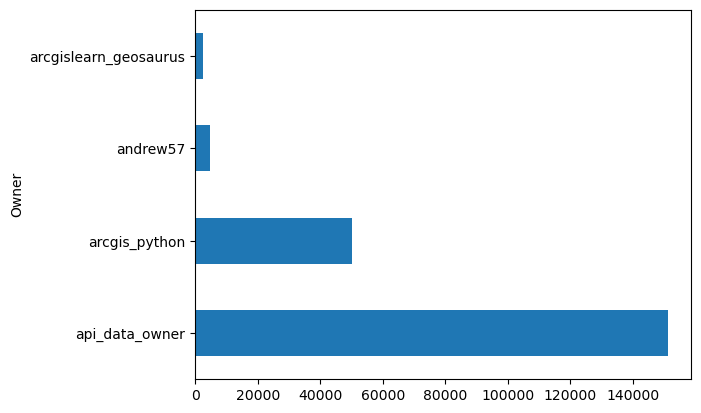

In [108]:
gb = cdf.groupby("Owner")["File Storage Size"].sum()
gb.nlargest(4).plot(kind="barh")

In [109]:
gb.sort_values(ascending=False)

Owner
api_data_owner             151053.34465
arcgis_python               50303.51498
andrew57                     4711.04894
arcgislearn_geosaurus        2510.25956
jyaist_geosaurus             1795.09068
ArcGISPyAPIBot               1179.67217
achapkowski_geosaurus         938.01018
MMajumdar_geosaurus           688.44709
esri_requests                 536.30800
maggarwal_geosaurus           468.58242
NGiner_geosaurus              459.49598
naubry_geosaurus              439.45944
jroebuck_geosaurus            364.80401
rsingh_geosaurus              319.07798
nparavicini_geosaurus         205.96928
ssong_geosaurus               142.96658
tkukreja_geosaurus             42.73857
DavidJVitale                   41.43429
ptuteja_geosaurus              16.51226
yjiang_geosaurus                6.56767
sdeep_geosaurus                 6.43410
bmajor_geosaurus                6.36644
sfoss_geosaurus                 5.34899
R_ArcGIS_UC2024                 3.02009
creatoraccount                  1.

#### Credit Report

##### Weekly

In [110]:
jun16 = dt.datetime(2024, 6, 16, tzinfo=pytz.timezone("UTC"))

In [111]:
credit_report_item = gis.users.me.report(
    report_type="credits",
    start_time=jun16,
    duration="weekly"
)

In [112]:
fp = credit_report_item.get_data()
crdf = pd.read_csv(fp, skiprows=3)

In [113]:
crdf

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
0,ArcGISPyAPIBot,NaN,11.25,1.05,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,MMajumdar_geosaurus,NaN,0.80,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NGiner_geosaurus,NaN,3.25,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Python API Test,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1861.79,55.68,0.07,0.11,2.53,0.54,0.04
4,andrew57,NaN,12.50,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,api_data_owner,python api,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.57,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,arcgis_python,python api,0.00,0.00,0.0,0.0,0.0,14.24,574.07,0.0,6.0,0.0,0.0,0.0,182.0,0.0,22.57,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,lxie_geosaurus,NaN,1.30,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,sdeep_geosaurus,NaN,25.65,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,ssong_geosaurus,NaN,5.50,0.05,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [114]:
for a,b,c in zip(list(crdf.columns)[::3], list(crdf.columns)[1::3], list(crdf.columns)[2::3]):
    print(f"{a:40}{b:40}{c:40}")
print(f"{list(crdf.columns)[24]:40}{list(crdf.columns)[25]:40}")

Credits Consumed by                     App Title                               ArcGIS Notebook - Interactive           
ArcGIS Notebook - Scheduled             Closest Facility Routes                 Demographic Maps                        
Feature Reports                         Geocoding                               GeoEnrichment                           
Location-Allocation                     Multi-Vehicle Routes                    Optimized Routes                        
Origin Destination Cost Matrix          Scene Layer Generation From Features    Service Areas                           
Simple Routes                           Spatial Analysis                        Tile Generation                         
Data Pipelines - Interactive            Data Pipelines - Scheduled              Imagery Analysis                        
Feature Storage                         File Storage                            Imagery Storage                         
Storage in an ArcGIS Notebooks  

In [115]:
nbi_filter = crdf["ArcGIS Notebook - Interactive"] > 0.0
nbs_filter = crdf["ArcGIS Notebook - Scheduled"] > 0.0
gc_filter = crdf["Geocoding"] > 0.0
fs_filter = crdf["Feature Storage"] > 0.0
sa_filter = crdf["Spatial Analysis"] > 0.0

combined_mask = nbi_filter | nbs_filter | gc_filter | fs_filter | sa_filter

crdf[combined_mask]

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
0,ArcGISPyAPIBot,NaN,11.25,1.05,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,MMajumdar_geosaurus,NaN,0.80,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,NGiner_geosaurus,NaN,3.25,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Python API Test,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1861.79,55.68,0.07,0.11,2.53,0.54,0.04
4,andrew57,NaN,12.50,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,api_data_owner,python api,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.57,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,arcgis_python,python api,0.00,0.00,0.0,0.0,0.0,14.24,574.07,0.0,6.0,0.0,0.0,0.0,182.0,0.0,22.57,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,lxie_geosaurus,NaN,1.30,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,sdeep_geosaurus,NaN,25.65,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,ssong_geosaurus,NaN,5.50,0.05,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### Monthly

In [116]:
date_time_str = "01/06/24"

In [117]:
then = dt.datetime.strptime(date_time_str, "%d/%m/%y")
then = pytz.timezone("US/Pacific").localize(then)

In [118]:
monthly_item2 = gis.users.me.report(
    report_type="credits", 
    duration="monthly", 
    start_time=then
)

In [119]:
monthly_item2

<Item title:"OrganizationCreditsMonthly_2024-06" type:Administrative Report owner:ArcGISPyAPIBot>

In [120]:
# Read the item data into a temporary CSV file
csv_credits_file = monthly_item2.get_data()

# Read the CSV as a DataFrame
mdf = pd.read_csv(csv_credits_file, skiprows=3)
mdf

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
0,ArcGISPyAPIBot,NaN,53.70,4.88,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,ArcGISPyAPIBot,python api,0.00,0.00,0.0,0.00,0.0,195.52,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,MMajumdar_geosaurus,NaN,23.35,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,MMajumdar_geosaurus,ArcGIS Notebooks,0.00,0.00,0.0,0.00,0.0,0.00,92.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,NGiner_geosaurus,NaN,8.65,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,NGiner_geosaurus,ArcGIS Pro,0.00,0.00,0.0,0.00,0.0,237.40,973.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Python API Test,NaN,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,7987.52,238.04,0.29,0.32,10.83,2.33,0.19
7,andrew57,NaN,12.50,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,api_data_owner,python api,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.58,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,arcgis_python,NaN,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,765.5,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [121]:
q = mdf["Spatial Analysis"] > 0
mdf[q]

,Credits Consumed by,App Title,ArcGIS Notebook - Interactive,ArcGIS Notebook - Scheduled,Closest Facility Routes,Demographic Maps,Feature Reports,Geocoding,GeoEnrichment,Location-Allocation,Multi-Vehicle Routes,Optimized Routes,Origin Destination Cost Matrix,Scene Layer Generation From Features,Service Areas,Simple Routes,Spatial Analysis,Tile Generation,Data Pipelines - Interactive,Data Pipelines - Scheduled,Imagery Analysis,Feature Storage,File Storage,Imagery Storage,Storage in an ArcGIS Notebooks,Scene Storage,Tile Storage,Vector Tiles Storage
8,api_data_owner,python api,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,arcgis_python,python api,0.0,0.0,0.0,0.0,0.0,95.24,2460.3,0.0,50.0,0.0,0.0,0.0,780.0,0.0,26.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,naubry_geosaurus,python api,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,479.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
monthly_item2.delete()

True

#### Removing Content

In [123]:
credit_report_item.delete()

True

In [124]:
content_report_item.delete()

True

In [125]:
%%capture --no-stdout --no-display

[item.delete() for item in user.items()]
user.delete()

True